# Este es mi TFM: un sistema recomendador de restaurantes# 

Aqui irán las distintas importaciones:

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Resumen NoteBook
1. [Carga y conocimiento de los datos](#cargaDatos)
2. [Codificación de los datos](#CodeData)


<a id='cargaDatos'></a>
## Carga y conocimiento de los datos

Carguemos cada archivo para poder ver el contenido:

1.1. [Tipo de pago en los restaurantes](#rTipoPago)

1.2. [Tipo de comida en los restaurantes](#rTipoComida)

1.3. [Horario de los restaurantes](#Horario)

1.4. [Tipo de parking en los restaurantes](#Parking)

1.5. [Ubicación de  los restaurantes](#Ubicacion)

1.6. [Preferencias culinarias de los usuarios](#uTipoComida)

1.7. [Preferencias de pago de los usuarios](#uTipoPago)

1.8. [Perfil de los usuarios](#uPerfil)

1.9. [Valoracion de los restaurantes por los usuarios](#rating)

Antes de importar los datos echemos una ojeada al fichero que describe los datos.

In [2]:
data_root = "./Data/"
readme = os.path.join(data_root, "README")
!cat $readme

1. Title of Database: Restaurant & consumer data, recommender systems domain

2. Sources:
   (a) Creators: 
Rafael Ponce Medellín and Juan Gabriel González Serna
rafaponce@cenidet.edu.mx, gabriel@cenidet.edu.mx
Department of Computer Science.
National Center for Research and Technological Development CENIDET, México
   (b) Donors of database:
Blanca Vargas-Govea and Juan Gabriel González Serna
blanca.vargas@cenidet.edu.mx/blanca.vg@gmail.com, gabriel@cenidet.edu.mx
Department of Computer Science.
National Center for Research and Technological Development CENIDET, México

3. Past Usage:
    (a) Blanca Vargas-Govea, Juan Gabriel González-Serna, Rafael Ponce-Medellín. Effects of relevant contextual features in the performance of a restaurant recommender system. In RecSys’11: Workshop on Context Aware Recommender Systems (CARS-2011), Chicago, IL, USA, October 23, 2011.
    (b) The task was to generate a top-n list of restaurants according to the consumer preferences. Finding the significan

<a id='rTipoPago'></a>
### Tipo de pago en los restaurantes

In [3]:
rTipoPago = pd.read_csv('Data/chefmozaccepts.csv',sep =",")

In [4]:
rTipoPago.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [5]:
len(rTipoPago["placeID"].unique())

615

In [6]:
rTipoPago["Rpayment"].unique()

array(['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Visa', 'Japan_Credit_Bureau', 'gift_certificates'],
      dtype=object)

## Ojo!!
Vemos que tenemos el valor VISA y Visa. Para asegurarnos vamos a poner todo en mayusculas

In [7]:
rTipoPago["Rpayment"]=rTipoPago["Rpayment"].str.upper()

In [8]:
len(rTipoPago["Rpayment"].unique())

11

Ahora sí, vemos que este fichero contiene 615 restaurantes y 11 métodos de pago. Los más usuales son:

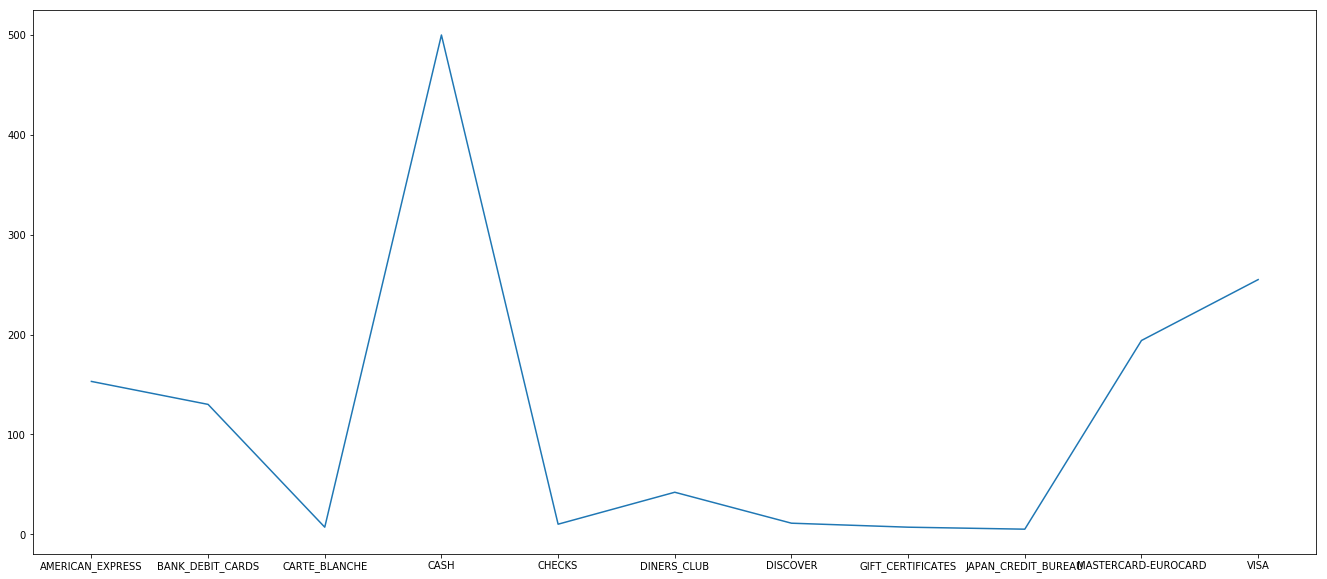

In [9]:
plt.figure(figsize=(23,10))
plt.plot(rTipoPago.groupby("Rpayment").count())

<a id='rTipoComida'></a>
### Tipo de comida en los restaurantes

In [10]:
rTipoComida = pd.read_csv('Data/chefmozcuisine.csv',sep =",")

In [11]:
rTipoComida.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [12]:
len(rTipoComida["placeID"].unique())

769

In [13]:
rTipoComida["Rcuisine"].unique()

array(['Spanish', 'Italian', 'Latin_American', 'Mexican', 'Fast_Food',
       'Burgers', 'Dessert-Ice_Cream', 'Hot_Dogs', 'Steaks', 'Asian',
       'International', 'Mongolian', 'Vegetarian', 'Brazilian',
       'Cafe-Coffee_Shop', 'Cafeteria', 'Contemporary', 'Deli-Sandwiches',
       'Diner', 'Japanese', 'Sushi', 'Seafood', 'Chinese', 'Bar',
       'Bar_Pub_Brewery', 'Pizzeria', 'Mediterranean', 'American',
       'Family', 'Caribbean', 'African', 'Breakfast-Brunch', 'Regional',
       'Afghan', 'Bakery', 'Game', 'Armenian', 'Vietnamese', 'Korean',
       'Thai', 'Barbecue', 'Polish', 'Dutch-Belgian', 'French', 'German',
       'Southwestern', 'Persian', 'Ethiopian', 'Juice', 'Soup',
       'Continental-European', 'Greek', 'Southern', 'Eastern_European',
       'California', 'Bagels', 'Turkish', 'Organic-Healthy',
       'Fine_Dining'], dtype=object)

In [14]:
len(rTipoComida["Rcuisine"].unique())

59

Vemos que este fichero contiene 769 restaurantes y 59 tipos de comida. Veamos los más usuales.

In [15]:
Tipos_Comida_Comunes=rTipoComida.groupby("Rcuisine").count().sort_values(by = "placeID", ascending=False)
Tipos_Comida_Comunes.head(10)

,placeID
Rcuisine,
Mexican,239
International,62
American,59
Dutch-Belgian,55
Italian,42
Greek,33
Bar,32
French,31
Cafe-Coffee_Shop,27


<a id='Horario'></a>
### Horario de los restaurantes

In [16]:
rHorario = pd.read_csv('Data/chefmozhours4.csv',sep =",")
rHorario

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;
5,135110,00:00-00:00;,Sun;
6,135109,08:00-21:00;,Mon;Tue;Wed;Thu;Fri;
7,135109,08:00-21:00;,Sat;
8,135109,08:00-21:00;,Sun;
9,135108,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;


In [17]:
len(rHorario["placeID"].unique())

694

Este fichero contiene 694 restaurantes y sus respectivos horarios.

<a id='Parking'></a>
### Tipo de parking en los restaurantes

In [4]:
rParking=pd.read_csv('Data/chefmozparking.csv',sep =",")
rParking

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none
5,135106,none
6,135105,none
7,135104,yes
8,135103,valet parking
9,135102,valet parking


In [19]:
len(rParking["placeID"].unique())

675

In [20]:
rParking["parking_lot"].unique()

array(['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking'], dtype=object)

Este fichero contiene 675 restaurantes y 7 tipos de parking. Veamos los mas usuales.

In [21]:
rParking.groupby("parking_lot").count().sort_values(by = "placeID", ascending=False)

,placeID
parking_lot,
none,348
yes,174
public,102
street,32
fee,22
valet parking,21
validated parking,3


<a id='Ubicacion'></a>
### Ubicación de  los restaurantes

In [2]:
geoplaces2=pd.read_csv('Data/geoplaces2.csv',sep =",")
geoplaces2

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
5,135040,22.135617,-100.969709,0101000020957F00001B552189B84A58C15A2AAEFD2CA2...,Restaurant los Compadres,Camino a Simon Diaz 155 Centro,San Luis Potosi,SLP,Mexico,?,...,Wine-Beer,none,informal,no_accessibility,high,?,familiar,f,closed,none
6,132732,23.754357,-99.171288,0101000020957F00008A20E615808157C16272FECBF84F...,Taqueria EL amigo,Calle Mezquite Fracc Framboyanes,Cd Victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,none,casual,completely,low,?,familiar,f,open,none
7,132875,22.149901,-100.993779,0101000020957F00008A2A0747DE4758C11EB31D2A31A8...,shi ro ie,?,?,?,?,?,...,Wine-Beer,section,informal,no_accessibility,high,?,familiar,t,open,Internet
8,132609,23.760268,-99.165865,0101000020957F0000A478418BBA8057C133851EB22C4E...,Pollo_Frito_Buenos_Aires,tampico,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,not permitted,informal,completely,low,?,quiet,t,closed,none
9,135082,22.151448,-100.915099,0101000020957F0000A29FAF95CD4958C1FEEEBB73A991...,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,SLP,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none


In [23]:
len(geoplaces2["placeID"].unique())

130

In [24]:
geoplaces2["state"].unique()

array(['Morelos', 's.l.p.', 'San Luis Potosi', 'tamaulipas', 'Tamaulipas',
       'SLP', '?', 'san luis potosi', 'morelos', 'slp', 'mexico',
       'san luis potos', 'S.L.P.'], dtype=object)

<a id='uTipoComida'></a>
### Preferencias culinarias de los usuarios

In [25]:
uTipoComida=pd.read_csv('Data/usercuisine.csv',sep =",")
uTipoComida

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch
5,U1004,Japanese
6,U1004,Contemporary
7,U1004,Mexican
8,U1004,Bagels
9,U1004,Cafe-Coffee_Shop


In [26]:
len(uTipoComida["userID"].unique())

138

In [27]:
uTipoComida["Rcuisine"].unique()

array(['American', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese',
       'Contemporary', 'Bagels', 'Cafe-Coffee_Shop',
       'Continental-European', 'Cafeteria', 'Family', 'Juice', 'Hawaiian',
       'Hot_Dogs', 'Latin_American', 'Korean', 'Italian', 'Diner',
       'Fast_Food', 'Deli-Sandwiches', 'Regional', 'Fusion', 'Portuguese',
       'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan',
       'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Pizzeria',
       'Burgers', 'Afghan', 'Middle_Eastern', 'Mongolian', 'Bar', 'Cuban',
       'Tex-Mex', 'Spanish', 'Soup', 'Sushi', 'Game', 'Doughnuts',
       'Australian', 'Asian', 'Dessert-Ice_Cream', 'Seafood', 'Turkish',
       'Organic-Healthy', 'Steaks', 'Mediterranean', 'British',
       'Austrian', 'Israeli', 'Russian-Ukrainian', 'Malaysian',
       'Vegetarian', 'Peruvian', 'Tapas', 'Eclectic', 'African', 'Basque',
       'Canadian', 'Irish', 'Southwestern', 'Tea_House', 'International',
       'Pacific_Northwest', '

El fichero contiene 138 usuarios con sus preferencias gastronomicas.

<a id='uTipoPago'></a>
### Preferencias de pago de los usuarios

In [28]:
uTipoPago=pd.read_csv('Data/userpayment.csv',sep =",")
uTipoPago

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards
5,U1005,cash
6,U1006,cash
7,U1007,cash
8,U1008,cash
9,U1009,cash


In [29]:
len(uTipoPago["userID"].unique())

133

In [30]:
uTipoPago["Upayment"].unique()

array(['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'American_Express'], dtype=object)

El fichero tiene 133 usuarios y sus métodos de pago.

<a id='uPerfil'></a>
### Perfil de los usuarios

In [2]:
uPerfil=pd.read_csv('Data/userprofile.csv',sep =",")
uPerfil

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69
5,U1006,22.150000,-100.983000,true,social drinker,no preference,friends,car owner,single,independent,1989,variety,hard-worker,none,student,blue,75,medium,1.80
6,U1007,22.118464,-100.938256,false,casual drinker,informal,solitary,public,single,independent,1989,variety,thrifty-protector,Catholic,student,purple,60,low,1.59
7,U1008,22.122989,-100.923811,false,social drinker,formal,solitary,public,single,independent,1989,technology,hard-worker,Catholic,student,green,68,low,1.72
8,U1009,22.159427,-100.990448,false,abstemious,formal,family,on foot,single,kids,1991,variety,thrifty-protector,Catholic,student,green,75,medium,1.78
9,U1010,22.190889,-100.998669,false,social drinker,no preference,friends,car owner,married,kids,1987,technology,hard-worker,none,student,green,40,medium,1.67


In [32]:
len(uPerfil["userID"].unique())

138

In [33]:
uPerfil.columns

Index(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
       'birth_year', 'interest', 'personality', 'religion', 'activity',
       'color', 'weight', 'budget', 'height'],
      dtype='object')

El fichero tiene el perfil de 138 usuarios distintos.

<a id='rating'></a>
### Valoracion de los restaurantes por los usuarios

In [34]:
rating=pd.read_csv('Data/rating_final.csv',sep =",")
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [35]:
len(rating["userID"].unique())

138

In [36]:
len(rating["placeID"].unique())

130

En este fichero tenemos las valoracion de los restaurantes por los usuarios. Tenemos que 138 usuarios han valorado 130 restaurantes. Veamos un resumen de las valoraciones.

In [37]:
rating.iloc[:,2:].describe()

,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000
mean,1.199828,1.215332,1.090439
std,0.773282,0.792294,0.790844
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


<a id='CodeData'></a>
## Codificación de los datos

Vamos a codificar (pasar el texto a códigos) los distintos valores del DataFrame rTipoComida.

In [38]:
rTipoComida_Clear = pd.get_dummies(rTipoComida,columns=['Rcuisine'])
rTipoComida_Clear.head(10)

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,135110,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,135109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,135107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,135106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,135104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,135103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,135103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,135103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,135103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vemos que un mismo placeID puede tener varios registros (uno por cada tipo de comida que ofrece) por lo que vamos a quitar "duplicados" agrupando.

In [39]:
rTipoComida_Clear = rTipoComida_Clear.groupby('placeID',as_index=False).sum()
rTipoComida_Clear.head(10)

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,132006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,132007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,132008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,132009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,132010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Veamos ahora el DataFrame rParking. Recordemos los valores que tenia.

In [40]:
rParking.parking_lot.unique()

array(['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking'], dtype=object)

In [6]:
def CodeParking(parking):
    if parking.upper()=='NONE':
        return 'None'
    elif parking.upper()=='YES':
        return 'Yes'
    else:
        return 'Other'

In [7]:
rParking_Clear=rParking.copy()
rParking_Clear["parking_lot"]=rParking_Clear["parking_lot"].map(CodeParking)
rParking_Clear=rParking_Clear.groupby('placeID',as_index=False).max()

Pruebas

In [16]:
uTipoPago['Upayment'].unique()

array(['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'American_Express'], dtype=object)

In [17]:
def CodeTipoPago(TPago):
    if TPago.upper()=='CASH':
        return 0
    else:
        return 1

In [24]:
uTipoPago_Clear=uTipoPago.copy()
uTipoPago_Clear['Upayment']=uTipoPago_Clear['Upayment'].map(CodeTipoPago)
uTipoPago_Clear = uTipoPago_Clear.groupby('userID',as_index=False).count()
uTipoPago_Clear.head()

,userID,Upayment
0,U1001,1
1,U1002,1
2,U1003,1
3,U1004,2
4,U1005,1


In [26]:
user_all = pd.merge(uPerfil,uTipoPago_Clear, how='left', on='userID')
# np.concatenate((uTipoComida.userID.unique(), uTipoPago.userID.unique(), uPerfil.userID.unique()))
user_all

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,Upayment
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1.0
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,1.0
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69,1.0
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53,2.0
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69,1.0
5,U1006,22.150000,-100.983000,true,social drinker,no preference,friends,car owner,single,independent,1989,variety,hard-worker,none,student,blue,75,medium,1.80,1.0
6,U1007,22.118464,-100.938256,false,casual drinker,informal,solitary,public,single,independent,1989,variety,thrifty-protector,Catholic,student,purple,60,low,1.59,1.0
7,U1008,22.122989,-100.923811,false,social drinker,formal,solitary,public,single,independent,1989,technology,hard-worker,Catholic,student,green,68,low,1.72,1.0
8,U1009,22.159427,-100.990448,false,abstemious,formal,family,on foot,single,kids,1991,variety,thrifty-protector,Catholic,student,green,75,medium,1.78,1.0
9,U1010,22.190889,-100.998669,false,social drinker,no preference,friends,car owner,married,kids,1987,technology,hard-worker,none,student,green,40,medium,1.67,1.0


Vamos a quedarnos y codificar las variables que queremos del fichero que nos da el perfil del usuario

In [3]:
uPerfil.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [7]:
uPerfil_Combo=uPerfil[['userID','smoker','drink_level','dress_preference','transport','budget']]
uPerfil_Combo=uPerfil_Combo[uPerfil_Combo['budget'] != '?']
uPerfil_Combo=uPerfil_Combo[uPerfil_Combo['transport'] != '?']
uPerfil_Combo=uPerfil_Combo[uPerfil_Combo['dress_preference'] != '?']
uPerfil_Combo=uPerfil_Combo[uPerfil_Combo['drink_level'] != '?']
uPerfil_Combo=uPerfil_Combo[uPerfil_Combo['smoker'] != '?']
uPerfil_Combo['smoker']=uPerfil_Combo['smoker'].str.capitalize()
uPerfil_Combo['drink_level']=uPerfil_Combo['drink_level'].str.capitalize()
uPerfil_Combo['dress_preference']=uPerfil_Combo['dress_preference'].str.capitalize()
uPerfil_Combo['transport']=uPerfil_Combo['transport'].str.capitalize()
uPerfil_Combo['budget']=uPerfil_Combo['budget'].str.capitalize()
uPerfil_Combo.to_csv(os.path.join('web/static/data/','uPerfil_Combo.csv'))

In [45]:
uPerfil_Clear=uPerfil[['userID','smoker','drink_level','dress_preference','transport','budget']]
uPerfil_Clear.head()

,userID,smoker,drink_level,dress_preference,transport,budget
0,U1001,false,abstemious,informal,on foot,medium
1,U1002,false,abstemious,informal,public,low
2,U1003,false,social drinker,formal,public,low
3,U1004,false,abstemious,informal,public,medium
4,U1005,false,abstemious,no preference,public,medium


In [46]:
uPerfil_Clear=uPerfil_Clear[uPerfil_Clear['budget'] != '?']

In [47]:
def CodeSmoker(TSmoke):
    if TSmoke.upper()=='TRUE':
        return 0
    else:
        return 1
    
def CodeAlcohol(Alcohol):
    if Alcohol.upper()=='ABSTEMIOUS':
        return 1
    else:
        return 0   
    
def CodeDress(Dress):
    if Dress.upper()=='INFORMAL' or Dress.upper()=='?':
        return 0
    elif Dress.upper()=='NO PREFERENCE':
        return 2
    else:
        return 1

def CodeTransport(Transport):
    if Transport.upper()=='CAR OWNER':
        return 0
    else:
        return 1
    
def CodeBudget(Budget):
    if Budget.upper() == 'LOW':
        return 0
    elif Budget.upper() == 'MEDIUM':
        return 1
    elif Budget.upper() == 'HIGH':
        return 2

In [48]:
uPerfil_Clear['smoker']=uPerfil_Clear['smoker'].map(CodeSmoker)
uPerfil_Clear['drink_level']=uPerfil_Clear['drink_level'].map(CodeAlcohol)
uPerfil_Clear['dress_preference']=uPerfil_Clear['dress_preference'].map(CodeDress)
uPerfil_Clear['transport']=uPerfil_Clear['transport'].map(CodeTransport)
uPerfil_Clear['budget']=uPerfil_Clear['budget'].map(CodeBudget)

In [49]:
uPerfil_Clear.head()

,userID,smoker,drink_level,dress_preference,transport,budget
0,U1001,1,1,0,1,1
1,U1002,1,1,0,1,0
2,U1003,1,0,1,1,0
3,U1004,1,1,0,1,1
4,U1005,1,1,2,1,1


In [50]:
uPerfil_Clear.to_csv(os.path.join('web/static/data/','uPerfil_Clear.csv'))

Por último, codifiquemos los datos relativos a los restaurantes.

In [51]:
geoplaces2.head(10)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
5,135040,22.135617,-100.969709,0101000020957F00001B552189B84A58C15A2AAEFD2CA2...,Restaurant los Compadres,Camino a Simon Diaz 155 Centro,San Luis Potosi,SLP,Mexico,?,...,Wine-Beer,none,informal,no_accessibility,high,?,familiar,f,closed,none
6,132732,23.754357,-99.171288,0101000020957F00008A20E615808157C16272FECBF84F...,Taqueria EL amigo,Calle Mezquite Fracc Framboyanes,Cd Victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,none,casual,completely,low,?,familiar,f,open,none
7,132875,22.149901,-100.993779,0101000020957F00008A2A0747DE4758C11EB31D2A31A8...,shi ro ie,?,?,?,?,?,...,Wine-Beer,section,informal,no_accessibility,high,?,familiar,t,open,Internet
8,132609,23.760268,-99.165865,0101000020957F0000A478418BBA8057C133851EB22C4E...,Pollo_Frito_Buenos_Aires,tampico,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,not permitted,informal,completely,low,?,quiet,t,closed,none
9,135082,22.151448,-100.915099,0101000020957F0000A29FAF95CD4958C1FEEEBB73A991...,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,SLP,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none


In [11]:
rInfo=geoplaces2[['placeID','name','alcohol','smoking_area','price','dress_code']]
rInfo=pd.merge(rInfo,rParking_Clear, how='inner', on='placeID')
rInfo['name']=rInfo['name'].str.capitalize()
rInfo['alcohol']=rInfo['alcohol'].str.capitalize()
rInfo['smoking_area']=rInfo['smoking_area'].str.capitalize()
rInfo['price']=rInfo['price'].str.capitalize()
rInfo['dress_code']=rInfo['dress_code'].str.capitalize()
rInfo.head()

,placeID,name,alcohol,smoking_area,price,dress_code,parking_lot
0,134999,Kiku cuernavaca,No_alcohol_served,None,Medium,Informal,None
1,132825,Puesto de tacos,No_alcohol_served,None,Low,Informal,None
2,135106,El rinc�n de san francisco,Wine-beer,Only at bar,Medium,Informal,None
3,132667,Little pizza emilio portes gil,No_alcohol_served,None,Low,Informal,None
4,132613,Carnitas_mata,No_alcohol_served,Permitted,Medium,Informal,Yes


In [12]:
rInfo.to_csv(os.path.join('web/static/data/','rInfo.csv'))